In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mat
import tensorflow as tf
import cv2, os

import warnings
warnings.filterwarnings('ignore')

In [4]:
pwd

'/home/rijul/Desktop/Projects new/Kaggle/Benetech'

In [5]:
test = '/home/rijul/Desktop/Projects new/Kaggle/Benetech/test/images'
train = '/home/rijul/Desktop/Projects new/Kaggle/Benetech/train/images'

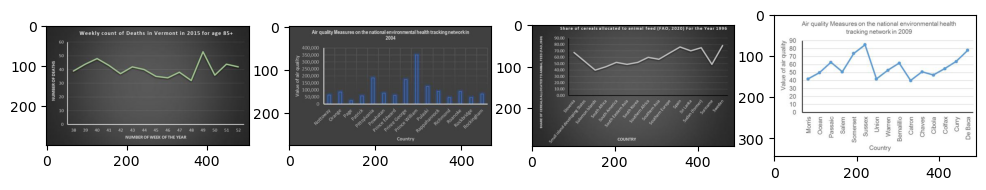

In [6]:
# Printing first 5 images from Training dataset
plt.figure(figsize = (12,6))
for i in range(4):
    file = os.listdir(train)[i]
    image_path = os.path.join(train,file)
    img = mat.image.imread(image_path)
    ax = plt.subplot(1,4,i+1)
    plt.imshow(img)

In [7]:
# For finding number of files in training image folder
total_img = 0
for _, _, files in os.walk(train):
    for Files in files:
        total_img += 1

print(total_img)

60578


In [8]:
# Loading all training images
name = list()
img_height = 224
img_width = 224
img_data_array = []

for i in range(0,100):
    file = os.listdir(train)[i]
    name.append(file.split(".")[0])
    image_path = os.path.join(train,file)
    
    # Reading the image and converting colour
    img = cv2.imread(image_path,cv2.COLOR_BGR2RGB)
    
    # Resizing image to same size
    img = cv2.resize(img, (img_height, img_width), interpolation = cv2.INTER_AREA)
    
    # Converting the image to a Numpy array with float32 as the datatype
    img = np.array(img)
    img = img.astype('float32')
    
    # Normalize the image array to have values scaled down between 0 and 1 from 0 to 255 for a similar data distribution, which helps with faster convergence
    img = img/255
    
    img_data_array.append(img)

In [9]:
print(name[1])

fbdf19c08154


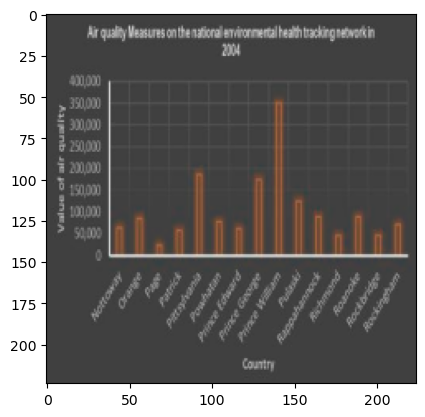

In [10]:
plt.imshow(img_data_array[1])

In [11]:
print(img_data_array[1])

[[[0.2509804 0.2509804 0.2509804]
  [0.2509804 0.2509804 0.2509804]
  [0.2509804 0.2509804 0.2509804]
  ...
  [0.2509804 0.2509804 0.2509804]
  [0.2509804 0.2509804 0.2509804]
  [0.2509804 0.2509804 0.2509804]]

 [[0.2509804 0.2509804 0.2509804]
  [0.2509804 0.2509804 0.2509804]
  [0.2509804 0.2509804 0.2509804]
  ...
  [0.2509804 0.2509804 0.2509804]
  [0.2509804 0.2509804 0.2509804]
  [0.2509804 0.2509804 0.2509804]]

 [[0.2509804 0.2509804 0.2509804]
  [0.2509804 0.2509804 0.2509804]
  [0.2509804 0.2509804 0.2509804]
  ...
  [0.2509804 0.2509804 0.2509804]
  [0.2509804 0.2509804 0.2509804]
  [0.2509804 0.2509804 0.2509804]]

 ...

 [[0.2509804 0.2509804 0.2509804]
  [0.2509804 0.2509804 0.2509804]
  [0.2509804 0.2509804 0.2509804]
  ...
  [0.2509804 0.2509804 0.2509804]
  [0.2509804 0.2509804 0.2509804]
  [0.2509804 0.2509804 0.2509804]]

 [[0.2509804 0.2509804 0.2509804]
  [0.2509804 0.2509804 0.2509804]
  [0.2509804 0.2509804 0.2509804]
  ...
  [0.2509804 0.2509804 0.2509804]
  [0

In [12]:
# Loading all testing images
name1 = list()
img_height = 224
img_width = 224
img_data_array1 = []

for j in range(0,1):
    file1 = os.listdir(test)[j]
    name1.append(file1.split(".")[0])
    image_path1 = os.path.join(test,file1)
    
    # Reading the image and converting colour
    img1 = cv2.imread(image_path1,cv2.COLOR_BGR2RGB)
    
    # Resizing image to same size
    img1 = cv2.resize(img1, (img_height, img_width), interpolation = cv2.INTER_AREA)
    
    # Converting the image to a Numpy array with float32 as the datatype
    img1 = np.array(img1)
    img1 = img1.astype('float32')
    
    # Normalize the image array to have values scaled down between 0 and 1 from 0 to 255 for a similar data distribution, which helps with faster convergence
    img1 = img1/255
    
    img_data_array1.append(img1)

In [13]:
train_ann = '/home/rijul/Desktop/Projects new/Kaggle/Benetech/train/annotations'

In [14]:
# For finding number of files in training annotation folder
total_ann = 0
for _, _, files in os.walk(train_ann):
    for Files in files:
        total_ann += 1
print(total_ann)

60578


In [15]:
# Loading all training annotations
import json

ann = list()
for j in range(0,100):
    ann_path = os.path.join(train_ann, str(name[j])+'.json')
    txt = json.load(open(ann_path))
    ann.append(txt)

In [16]:
# First .json file data
txt1 = json.load(open('/home/rijul/Desktop/Projects new/Kaggle/Benetech/train/annotations/' + str(name[0]) + '.json'))

In [17]:
# Extracting graph type in First .json file
val = []
for value in txt1['visual-elements']:
    if txt1['visual-elements'][value] != []:
        
        values = list(txt1['visual-elements'].values())
        keys = list(txt1['visual-elements'].keys())
        plot_type = keys[values.index(txt1['visual-elements'][value])]
print(plot_type)

lines


In [18]:
# Visualizing all x & y points in First .json file

print(txt1['data-series'])

[{'x': '38', 'y': 39.22393343308639}, {'x': '39', 'y': 44.209226717148866}, {'x': '40', 'y': 47.611926215973966}, {'x': '41', 'y': 42.85936689154127}, {'x': '42', 'y': 37.261226410162585}, {'x': '43', 'y': 41.81431334622825}, {'x': '44', 'y': 39.64115592251509}, {'x': '45', 'y': 34.72883970325393}, {'x': '46', 'y': 33.77414482923081}, {'x': '47', 'y': 37.640232108317235}, {'x': '48', 'y': 33.040292042389716}, {'x': '49', 'y': 51.48858800773702}, {'x': '50', 'y': 36.13815214223256}, {'x': '51', 'y': 43.8233397807866}, {'x': '52', 'y': 41.94068343004515}]


In [19]:
# Extracting x & y points in First .json file

axis_points = []

for k in range(len(txt1['data-series'])):
    axis_points.append(list(txt1['data-series'][k].values()))
    
axis_points

[['38', 39.22393343308639],
 ['39', 44.209226717148866],
 ['40', 47.611926215973966],
 ['41', 42.85936689154127],
 ['42', 37.261226410162585],
 ['43', 41.81431334622825],
 ['44', 39.64115592251509],
 ['45', 34.72883970325393],
 ['46', 33.77414482923081],
 ['47', 37.640232108317235],
 ['48', 33.040292042389716],
 ['49', 51.48858800773702],
 ['50', 36.13815214223256],
 ['51', 43.8233397807866],
 ['52', 41.94068343004515]]

In [20]:
# Extracting axis points in all .json file
axis_p = []
for tx in ann:
    axis_points=[]
    for k in range(len(tx['data-series'])):
        axis_points.append(list(tx['data-series'][k].values()))
    axis_p.append(axis_points)

In [21]:
# List to Array
axis_p_array = np.array(axis_p)

In [22]:
# Extracting graph types in all .json file
graph = []
for tx in ann:
    for value in tx['visual-elements']:
        if tx['visual-elements'][value] != []:
            values = list(txt1['visual-elements'].values())
            keys = list(txt1['visual-elements'].keys())
            plot_type = keys[values.index(txt1['visual-elements'][value])]
            graph.append(plot_type)

In [23]:
# Creating a dictionary of all graphs:
graph_dict = {k:v for v,k in enumerate(np.unique(graph))}
graph_dict

{'bars': 0, 'lines': 1}

In [24]:
# list of graph types
graph_val=  [graph_dict[graph[i]] for i in range(len(graph))]

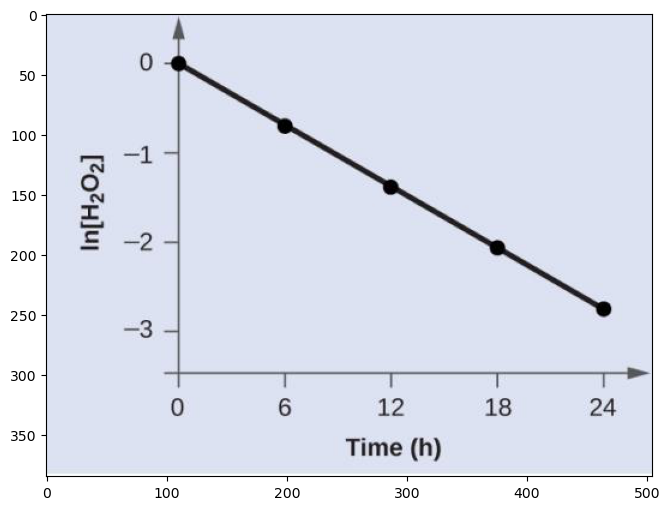

In [27]:
# Printing first image from Testing dataset
plt.figure(figsize = (12,6))
for i in range(1):
    file = os.listdir(test)[i]
    image_path = os.path.join(test,file)
    img = mat.image.imread(image_path)
    ax = plt.subplot(1,1,i+1)
    plt.imshow(img)

### Predicting

In [29]:
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

model = tf.keras.applications.resnet50.ResNet50()

In [30]:
X_train = tf.cast(np.array(img_data_array), tf.float64)
Y_train = tf.cast(np.array(graph_val), tf.int32)

In [31]:
X_test = tf.cast(np.array(img_data_array1), tf.float64)

In [32]:
model.compile(loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'], optimizer = 'adam')

In [33]:
model.fit(X_train, Y_train, epochs = 2, verbose = 1)

Epoch 1/2
4/4 [==============================] - 17s 2s/step - loss: 4.6833 - accuracy: 0.4400
Epoch 2/2
4/4 [==============================] - 11s 2s/step - loss: 0.2871 - accuracy: 0.9900


In [34]:
Y_test = model.predict(X_test)
pred = decode_predictions(Y_test)
print(pred)

1/1 [==============================] - 0s 412ms/step
[[('n03063599', 'coffee_mug', 0.012140899), ('n07860988', 'dough', 0.01168815), ('n03775546', 'mixing_bowl', 0.010760228), ('n04376876', 'syringe', 0.009491071), ('n07693725', 'bagel', 0.0093903355)]]
